In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

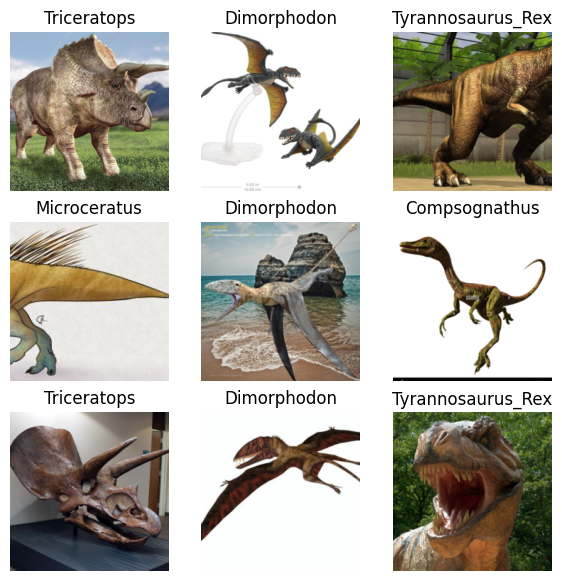

In [2]:
from fastai.vision.all import *

# Path to the dataset directory
path = Path('/kaggle/input/dino-data')

# Define the DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,  # Labels based on folder names
    item_tfms=Resize(224)
)

# Create the DataLoaders
dls = dblock.dataloaders(path)

# Display a batch of images
dls.show_batch(max_n=9, figsize=(7, 7))



epoch,train_loss,valid_loss,accuracy,time
0,3.218262,1.386003,0.582822,00:44


epoch,train_loss,valid_loss,accuracy,time
0,1.447161,0.957860,0.707566,00:45
1,0.939088,0.742500,0.793456,00:43
2,0.608466,0.670245,0.807771,00:44
3,0.413351,0.665750,0.799591,00:43


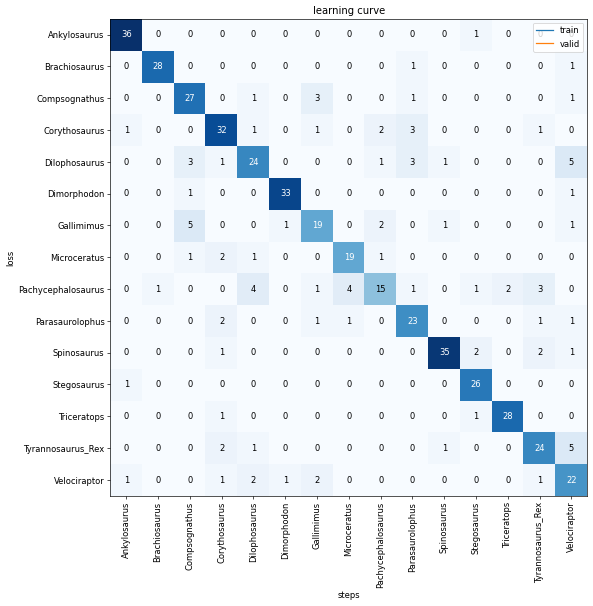

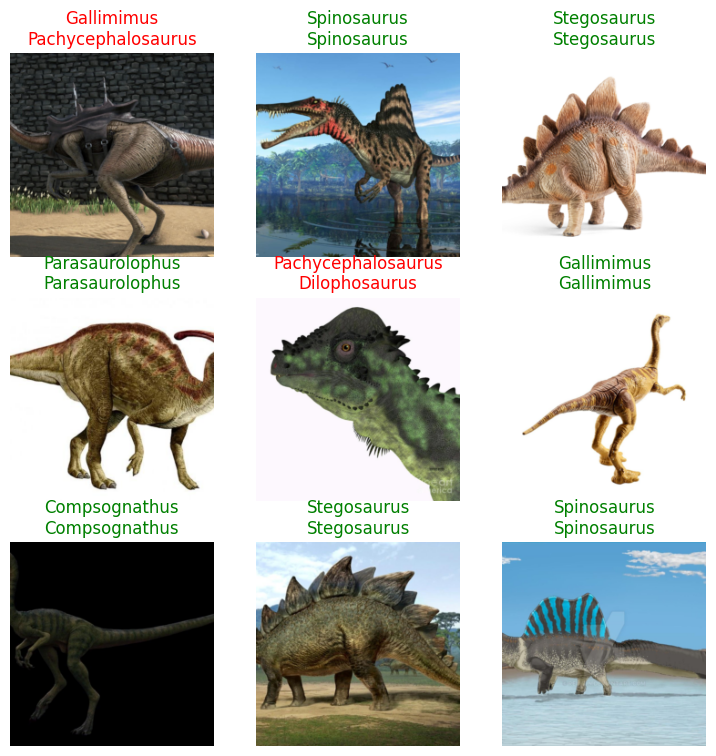

In [4]:
# Create and train model
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

# Plot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

# Plot training and validation loss
learn.recorder.plot_loss()

# Show results
learn.show_results()

Number of training items: 1959
Number of validation items: 489


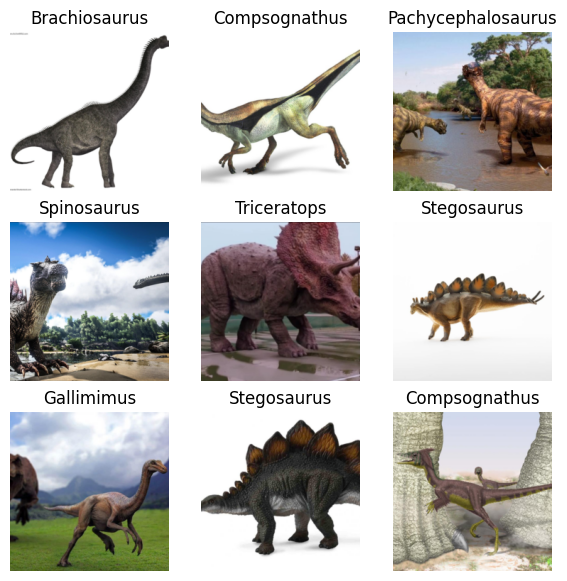

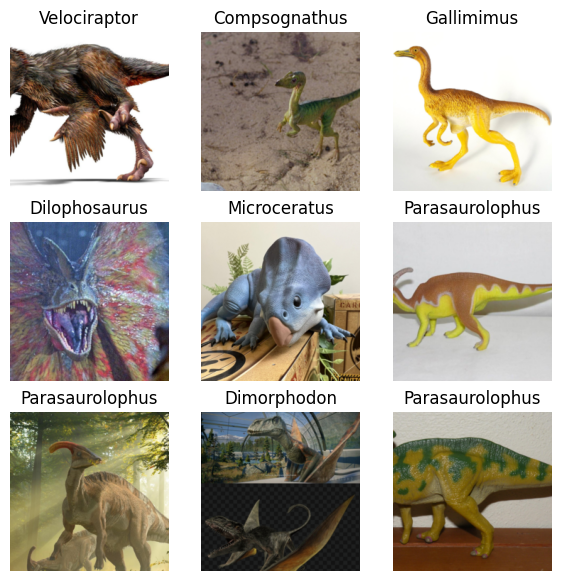

In [5]:
train_dl = dls.train
valid_dl = dls.valid

# Display batches of images
dls.train.show_batch(max_n=9, figsize=(7, 7))
dls.valid.show_batch(max_n=9, figsize=(7, 7))

# Check sizes of training and validation sets
num_train = len(dls.train.dataset)
num_valid = len(dls.valid.dataset)

print(f"Number of training items: {num_train}")
print(f"Number of validation items: {num_valid}")

In [1]:
import torch
torch.cuda.empty_cache()



epoch,train_loss,valid_loss,accuracy,time
0,2.568859,2.427414,0.214724,01:02


epoch,train_loss,valid_loss,accuracy,time
0,2.213138,2.168278,0.392638,00:59
1,1.910708,1.873630,0.509202,01:00
2,1.680578,1.678581,0.576687,01:00
3,1.537932,1.641247,0.580777,01:00


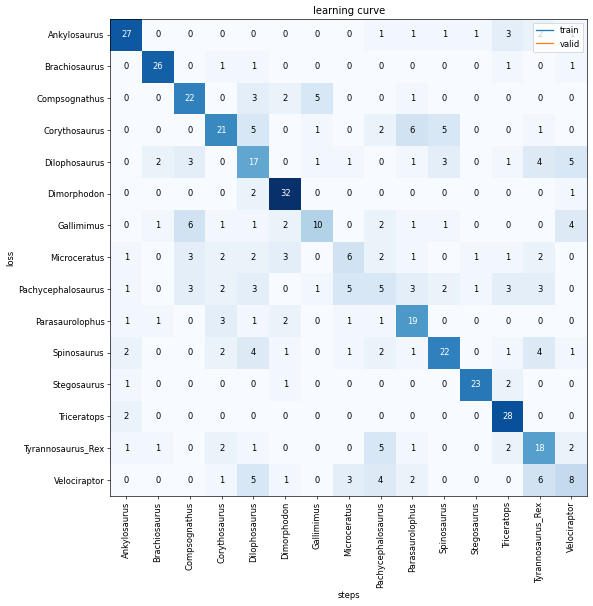

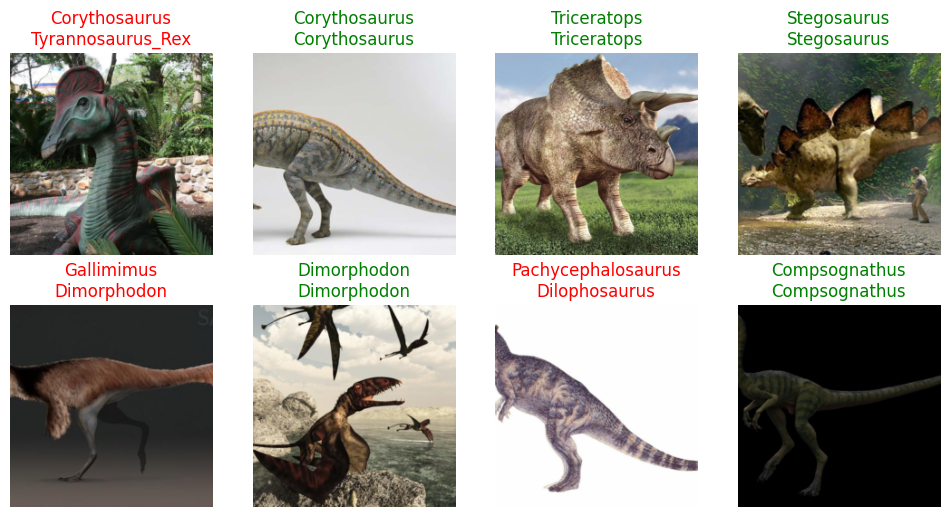

In [3]:
from fastai.vision.all import *
import timm
import torch.nn as nn

# Define a custom model function
def convit_model():
    # Load a pretrained ConViT model from TIMM
    model = timm.create_model('convit_base', pretrained=True)
    
    # Modify the final layer to match the number of classes in your dataset
    num_classes = len(dls.vocab)  # Number of classes from DataLoaders
    model.head = nn.Linear(model.head.in_features, num_classes)
    
    return model

# Load data with the correct image size
path = Path('/kaggle/input/dino-data')
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)  # Resize images to 224x224
)
dls = dblock.dataloaders(path, bs=8)  # Adjust batch size if needed

# Use mixed precision to reduce memory usage
learn = Learner(dls, convit_model(), metrics=accuracy, cbs=MixedPrecision())

# Train the model
learn.fine_tune(4)

# Plot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

# Plot training and validation loss
learn.recorder.plot_loss()

# Show results
learn.show_results()


Number of training items: 1959
Number of validation items: 489


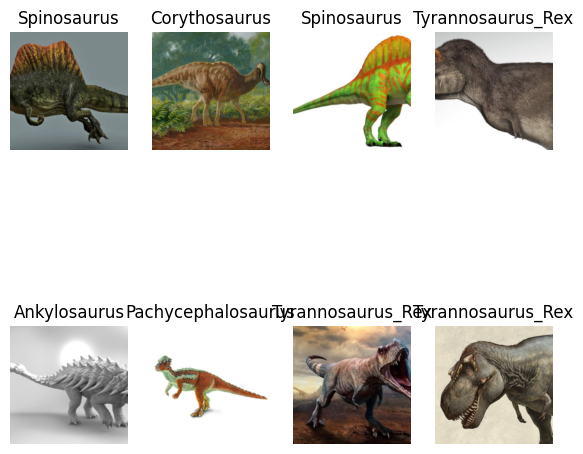

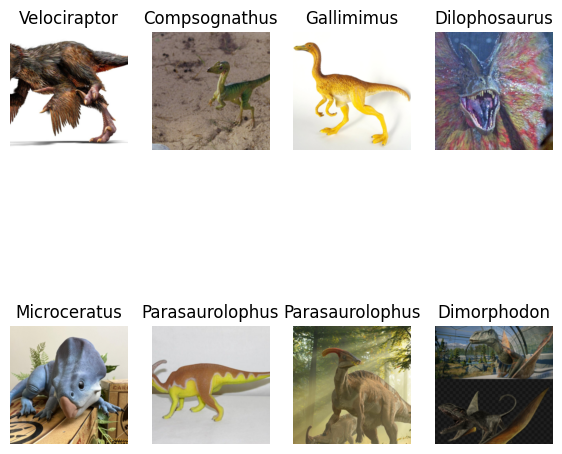

In [4]:
train_dl = dls.train
valid_dl = dls.valid

# Display batches of images
dls.train.show_batch(max_n=9, figsize=(7, 7))
dls.valid.show_batch(max_n=9, figsize=(7, 7))

# Check sizes of training and validation sets
num_train = len(dls.train.dataset)
num_valid = len(dls.valid.dataset)

print(f"Number of training items: {num_train}")
print(f"Number of validation items: {num_valid}")